### Load dataset and Preprocess data

In [18]:
# packages
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train.shape[1]

28

In [21]:
x_train.shape[2]

28

## Fully Connected Neural Networks

### Preprocess for fully connected neural networks

In [22]:
image_vector_size = x_train.shape[1] * x_train.shape[2]

x_train_nn = x_train.reshape(x_train.shape[0],image_vector_size)
x_test_nn = x_test.reshape(x_test.shape[0],image_vector_size)

# Encode the outputs with one hot coding
y_train_nn = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test_nn = np_utils.to_categorical(y_test)
num_classes = y_test_nn.shape[1]

In [23]:
x_train_nn.shape

(60000, 784)

In [24]:
y_train_nn.shape

(60000, 10)

In [25]:
num_classes

10

### Build a fully connected neural networks model

In [26]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=image_vector_size, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compile the model

In [27]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Plot the model

In [28]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [29]:
# fit the keras model on the dataset
history = model.fit(x_train_nn, y_train_nn, epochs=10, batch_size=32, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 4.0802 - accuracy: 0.1788
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 2.1516 - accuracy: 0.1841
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 2.1756 - accuracy: 0.1756
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 2.2081 - accuracy: 0.1578
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 2.1689 - accuracy: 0.1799
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 2.2671 - accuracy: 0.1564
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 2.3006 - accuracy: 0.1146
Epoch 8/10
60000/60000 [==============================] - 4s 73us/step - loss: 2.3002 - accuracy: 0.1129
Epoch 9/10
60000/60000 [==============================] - 4s 71us/step - loss: 2.3001 - accuracy: 0.1129
Epoch 10/10
60000/60000 [==============================

### Evaluate the trained model with testing dataset

In [30]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn, y_test_nn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 11.41%


### Change the model structure

#### Change the number of neurons

In [31]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=image_vector_size, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [33]:
# plot the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fit the keras model on the dataset
model.fit(x_train_nn, y_train_nn, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/step - loss: 21.3820 - accuracy: 0.2010
Epoch 2/5
60000/60000 [==============================] - 6s 106us/step - loss: 2.0775 - accuracy: 0.2512
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 2.0003 - accuracy: 0.2702
Epoch 4/5
60000/60000 [==============================] - 6s 104us/step - loss: 2.0564 - accuracy: 0.2567
Epoch 5/5
60000/60000 [==============================] - 6s 99us/step - loss: 1.9881 - accuracy: 0.2776


In [35]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn, y_test_nn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 31.23%


#### Change the number of layers

In [36]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=image_vector_size, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [37]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [38]:
# plot the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [39]:
# fit the keras model on the dataset
model.fit(x_train_nn, y_train_nn, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 95us/step - loss: 11.1327 - accuracy: 0.1122
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/5
60000/60000 [==============================] - 5s 89us/step - loss: 2.3013 - accuracy: 0.1124


In [40]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn, y_test_nn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 11.35%


#### Change the activation function

In [41]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=image_vector_size, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [42]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [43]:
# plot the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [44]:
# fit the keras model on the dataset
model.fit(x_train_nn, y_train_nn, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 1.0396 - accuracy: 0.7569
Epoch 2/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.5821 - accuracy: 0.8591
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.4940 - accuracy: 0.8728
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.4485 - accuracy: 0.8776
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4136 - accuracy: 0.8835


In [45]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn, y_test_nn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.84%


Initial thoughts after changing the model structure:
- The initial model using "Relu" activation function with 1 hidden layer of 32 neurons and 1 output layer of 10 neurons shows a low accuracy rate of 11.24% which remains the same after the the fourth epoch.
- The first adjustment of the initial model with added neurons (from 32 to 128) shows a considerably higher accuracy rate of testing dataset while still exhibiting a fluctuation in the accuracy rate in the training process.
- Adding additional two dense layers for the initial model indicates a slightly higher result in testing dataset while still remaining the same accuracy rates in training process.
- The third adjustment of the initial model changing from "Relu" to "Sigmoid" activation function shows a significant improvement in the model's performance from 11.24% to 88.84% in testing dataset. In addition, the accuracy rates in the training process increase gradually through each epoch, indicating a better predictability of the model.

Questions for further adjustments and fine-tuning process
- Why "Sigmoid" activation function shows a better result than "Relu" activation function?
- Would increasing the network depth (increase the number of layers) lead to better models?
- Would increasing the layer width (increase the number of neurons in each layer) create better results?
- Could the combination of these adjustments create an optimal model?

### Relu vs Sigmoid activation function

A potential explanation is the used input for the above models ranges from 0 to 255, causing the weighted sum of the layer (z) to be too big. If z is often big, then Relu(z) = z, leading to the lost of non-linear aspect of this activation function. In addition, if z is in the range between 0 and 255, the value of z is often far from 0, avoiding non-linear patterns around 0 and not resembling the non-linear shape of Relu function. Also, without scaling the input, this results in larger weights of the neural networks, making the models unstable and increasing the generalization error.

In constrast, Sigmoid function squishes the input value between 0 and 1. This allows the value of z to be close to 0, below 0 or higher than 0 depends on the initial weights, making the neuron activated or deactivated. This could potentially be the reason why the model works better with the input in range between 0 and 1.

Therefore, an adjustment that could be made is to normalize the input data and reapply the Relu activation function to observe the change in the performance of the model.

In [341]:
# Reshaping and normalizing input dataset
x_train_nn_nl = x_train.reshape(60000, 784)     
x_test_nn_nl = x_test.reshape(10000, 784)
x_train_nn_nl = x_train_nn_nl.astype('float32') / 255
x_test_nn_nl = x_test_nn_nl.astype('float32') / 255

# Encode the outputs with one hot coding
y_train_nn_nl = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test_nn_nl = np_utils.to_categorical(y_test)

In [342]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=image_vector_size, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [343]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [344]:
# fit the keras model on the dataset
model.fit(x_train_nn_nl, y_train_nn_nl, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.7126 - accuracy: 0.8156
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3610 - accuracy: 0.8966
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3156 - accuracy: 0.9101
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2901 - accuracy: 0.9171
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2705 - accuracy: 0.9229


In [345]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn_nl, y_test_nn_nl, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.95%


After normalizing the input, the model shows a significant improvement in performance. Therefore, it can be recommended that we should normalize input data before applying Relu function in neural networks.

### Network Depth

In [373]:
def create_model(layer_sizes,activation_func):
    
    model = Sequential()
    
    model.add(Dense(layer_sizes[0], input_dim=image_vector_size, activation=activation_func))
    
    for i in layer_sizes[1:]:
        model.add(Dense(i, activation=activation_func))
    
    model.add(Dense(10, activation='softmax'))
    
    return model

def compile_and_plot(model,x,y, epochs = 5, batch_size = 32):
    
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    history = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose = 1)
    
    import matplotlib.pyplot as plt
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

##### 1 hidden layer

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 113us/step - loss: 1.0392 - accuracy: 0.7410 - val_loss: 0.5991 - val_accuracy: 0.8683
Epoch 2/5
54000/54000 [==============================] - 5s 97us/step - loss: 0.5771 - accuracy: 0.8570 - val_loss: 0.4639 - val_accuracy: 0.8935
Epoch 3/5
54000/54000 [==============================] - 5s 90us/step - loss: 0.4885 - accuracy: 0.8712 - val_loss: 0.3978 - val_accuracy: 0.9027
Epoch 4/5
54000/54000 [==============================] - 5s 93us/step - loss: 0.4486 - accuracy: 0.8799 - val_loss: 0.3728 - val_accuracy: 0.9080
Epoch 5/5
54000/54000 [==============================] - 5s 90us/step - loss: 0.4316 - accuracy: 0.8795 - val_loss: 0.3754 - val_accuracy: 0.9057


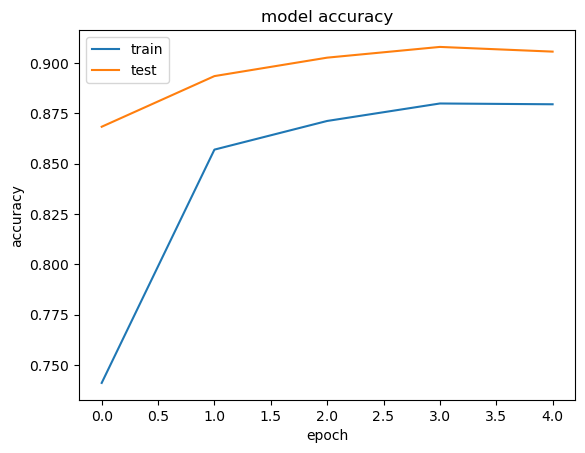

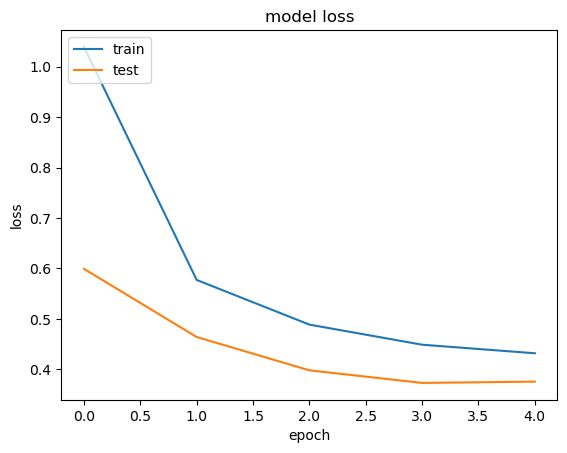

In [374]:
activation_func = "sigmoid"
hidden_layer = 1
model = create_model([32]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

##### 2 hidden layers

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 127us/step - loss: 1.8316 - accuracy: 0.5729 - val_loss: 1.3877 - val_accuracy: 0.7600
Epoch 2/5
54000/54000 [==============================] - 6s 103us/step - loss: 1.1393 - accuracy: 0.7669 - val_loss: 0.8739 - val_accuracy: 0.8163
Epoch 3/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.8245 - accuracy: 0.8135 - val_loss: 0.6762 - val_accuracy: 0.8617
Epoch 4/5
54000/54000 [==============================] - 5s 94us/step - loss: 0.6800 - accuracy: 0.8404 - val_loss: 0.5634 - val_accuracy: 0.8777
Epoch 5/5
54000/54000 [==============================] - 5s 92us/step - loss: 0.5918 - accuracy: 0.8602 - val_loss: 0.4833 - val_accuracy: 0.8897


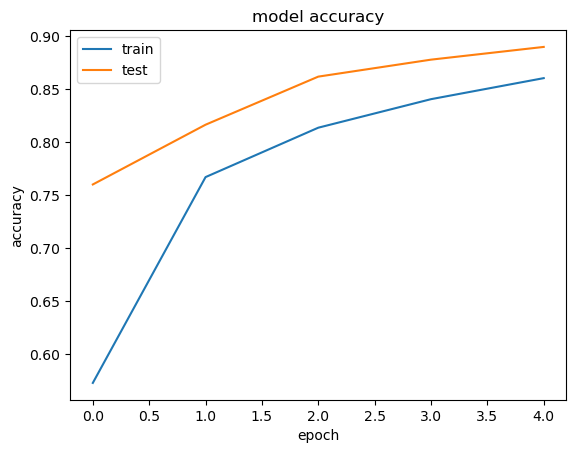

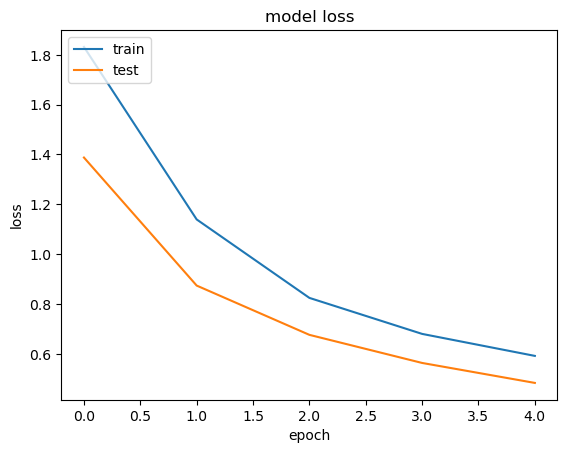

In [375]:
activation_func = "sigmoid"
hidden_layer = 2
model = create_model([32]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

##### 3 hidden layers

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 119us/step - loss: 2.2590 - accuracy: 0.1816 - val_loss: 2.1980 - val_accuracy: 0.2925
Epoch 2/5
54000/54000 [==============================] - 5s 100us/step - loss: 2.0759 - accuracy: 0.3631 - val_loss: 1.9030 - val_accuracy: 0.4240
Epoch 3/5
54000/54000 [==============================] - 6s 109us/step - loss: 1.7727 - accuracy: 0.4677 - val_loss: 1.6174 - val_accuracy: 0.5375
Epoch 4/5
54000/54000 [==============================] - 6s 106us/step - loss: 1.5094 - accuracy: 0.5979 - val_loss: 1.3349 - val_accuracy: 0.6703
Epoch 5/5
54000/54000 [==============================] - 5s 99us/step - loss: 1.2573 - accuracy: 0.6649 - val_loss: 1.0992 - val_accuracy: 0.7340


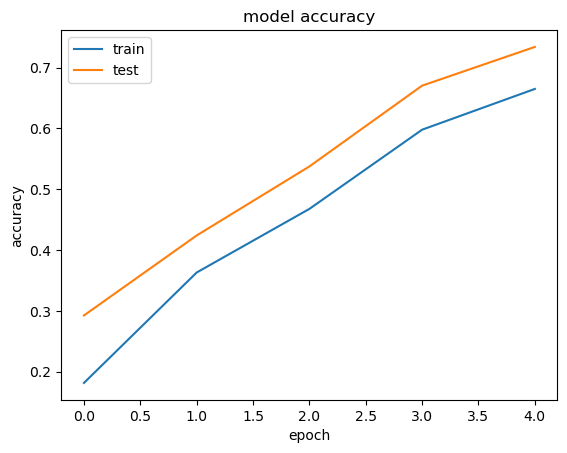

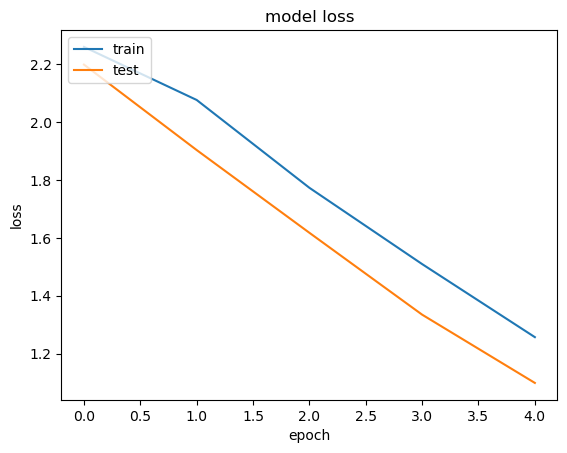

In [376]:
activation_func = "sigmoid"
hidden_layer = 3
model = create_model([32]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

##### 4 hidden layers

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 149us/step - loss: 2.3013 - accuracy: 0.1167 - val_loss: 2.2956 - val_accuracy: 0.1050
Epoch 2/5
54000/54000 [==============================] - 7s 121us/step - loss: 2.2921 - accuracy: 0.1249 - val_loss: 2.2894 - val_accuracy: 0.1050
Epoch 3/5
54000/54000 [==============================] - 6s 116us/step - loss: 2.2839 - accuracy: 0.1380 - val_loss: 2.2779 - val_accuracy: 0.1760
Epoch 4/5
54000/54000 [==============================] - 6s 109us/step - loss: 2.2693 - accuracy: 0.1828 - val_loss: 2.2551 - val_accuracy: 0.4327
Epoch 5/5
54000/54000 [==============================] - 6s 117us/step - loss: 2.2337 - accuracy: 0.3122 - val_loss: 2.1964 - val_accuracy: 0.3663


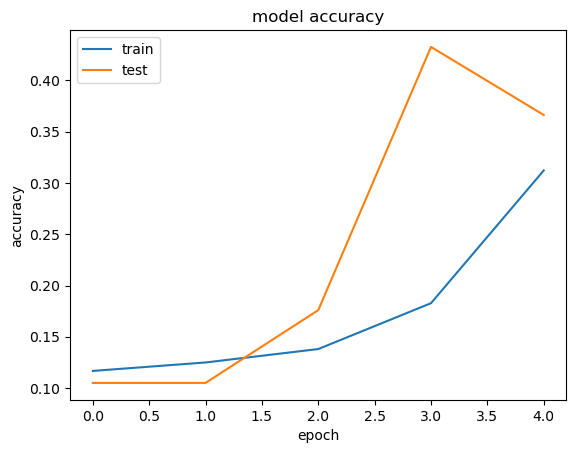

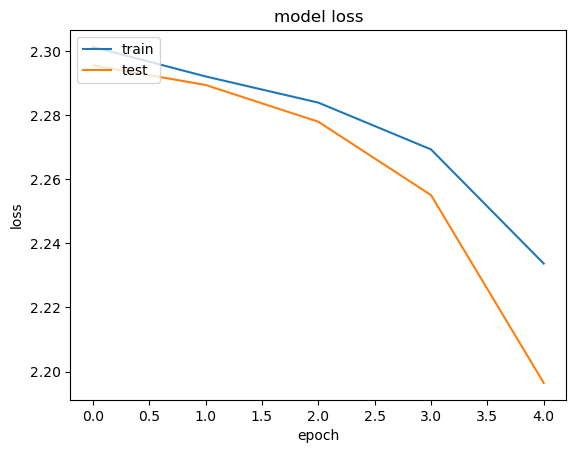

In [377]:
activation_func = "sigmoid"
hidden_layer = 4
model = create_model([32]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

##### 5 hidden layers

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 135us/step - loss: 2.3051 - accuracy: 0.1111 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 2/5
54000/54000 [==============================] - 6s 112us/step - loss: 2.3014 - accuracy: 0.1130 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/5
54000/54000 [==============================] - 7s 122us/step - loss: 2.3011 - accuracy: 0.1131 - val_loss: 2.3010 - val_accuracy: 0.1075
Epoch 4/5
54000/54000 [==============================] - 7s 124us/step - loss: 2.3009 - accuracy: 0.1130 - val_loss: 2.3015 - val_accuracy: 0.1050
Epoch 5/5
54000/54000 [==============================] - 7s 123us/step - loss: 2.3005 - accuracy: 0.1143 - val_loss: 2.3003 - val_accuracy: 0.1997


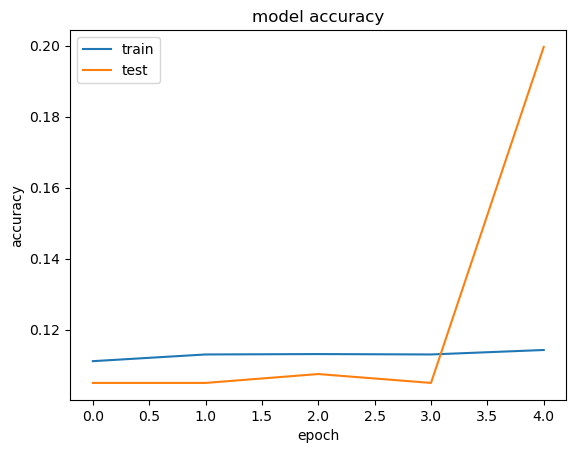

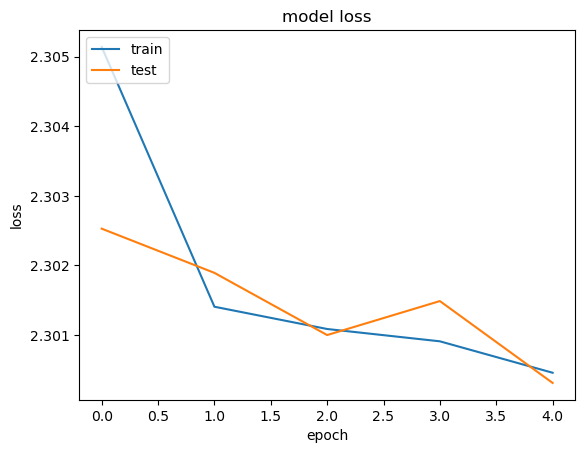

In [378]:
activation_func = "sigmoid"
hidden_layer = 5
model = create_model([32]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

From the results above, it is clear that the model starts decreasing accuracy rate and increasing loss after adding more hidden layers to the neural networks. This is a sign of overfitting which can be explained by several reasons:
- Neural networks are flexible enough that they can adjust their parameters to fit the training data so precisely that they can no longer generalize the testing data.
- Adding more hidden layers means more trainable parameters to the model, making it to be more prone to overfitting. Therefore, a solution is to simplify the model by reducing the number of layers or the number of neurons in each layer.
- As we are using "Sigmoid" activation function for the neural networks, this could lead to Vanishing Gradient problem, causing the model's performance to decrease. This occurs when the gradients of the loss function with respect to the parameters become very small as they are backpropagated through layers of the network, causing the weights to update extremely slow or not at all. This can significantly slow down or prevent the convergence of the network during training. A way to address this problem is using a different activation function such as "Relu" or Batch Normalization.

### Layer Width

#### 32 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 106us/step - loss: 1.0690 - accuracy: 0.7412 - val_loss: 0.6258 - val_accuracy: 0.8692
Epoch 2/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.5974 - accuracy: 0.8560 - val_loss: 0.4419 - val_accuracy: 0.8992
Epoch 3/5
54000/54000 [==============================] - 6s 107us/step - loss: 0.4892 - accuracy: 0.8739 - val_loss: 0.4128 - val_accuracy: 0.9023
Epoch 4/5
54000/54000 [==============================] - 5s 92us/step - loss: 0.4469 - accuracy: 0.8801 - val_loss: 0.3682 - val_accuracy: 0.9047
Epoch 5/5
54000/54000 [==============================] - 5s 88us/step - loss: 0.4157 - accuracy: 0.8857 - val_loss: 0.3623 - val_accuracy: 0.9070


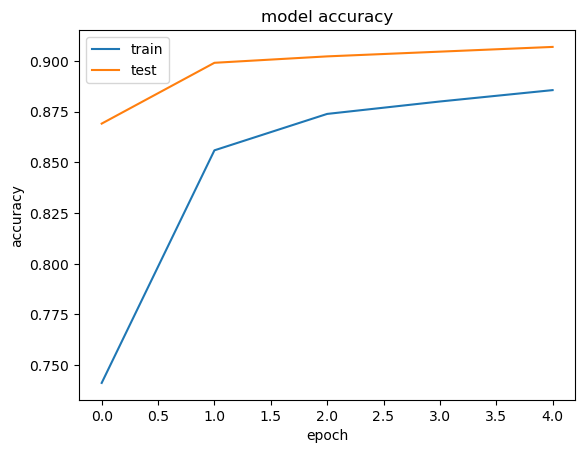

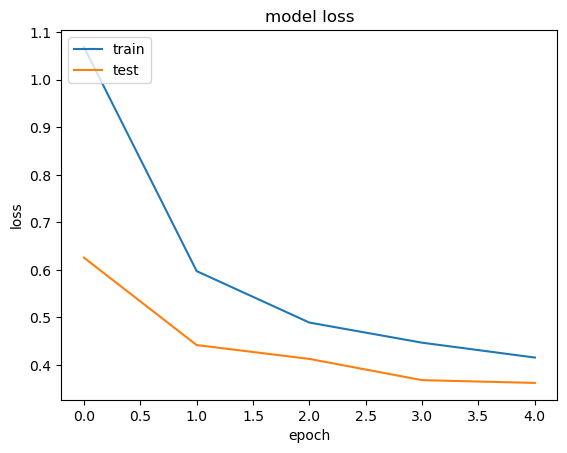

In [386]:
activation_func = "sigmoid"
neurons = 32
model = create_model([neurons],activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

#### 64 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 135us/step - loss: 0.8136 - accuracy: 0.8035 - val_loss: 0.4258 - val_accuracy: 0.9063
Epoch 2/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.4420 - accuracy: 0.8861 - val_loss: 0.3518 - val_accuracy: 0.9117
Epoch 3/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.3835 - accuracy: 0.8988 - val_loss: 0.2986 - val_accuracy: 0.9220
Epoch 4/5
54000/54000 [==============================] - 6s 113us/step - loss: 0.3483 - accuracy: 0.9037 - val_loss: 0.2793 - val_accuracy: 0.9252
Epoch 5/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.3264 - accuracy: 0.9092 - val_loss: 0.2603 - val_accuracy: 0.9272


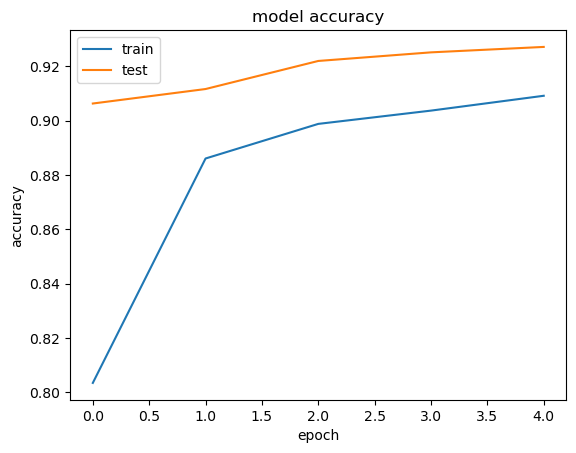

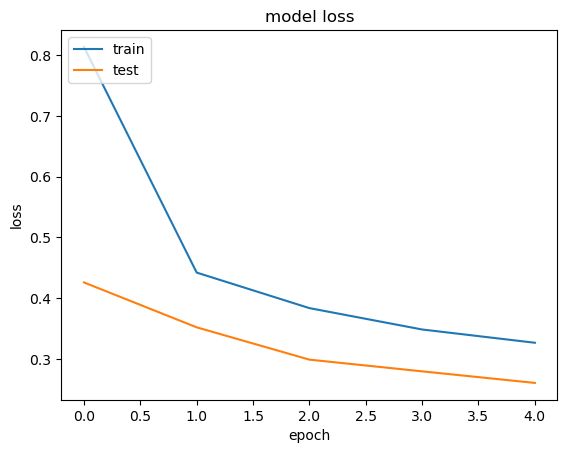

In [387]:
activation_func = "sigmoid"
neurons = 64
model = create_model([neurons],activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

#### 128 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 157us/step - loss: 0.7118 - accuracy: 0.8165 - val_loss: 0.3836 - val_accuracy: 0.9117
Epoch 2/5
54000/54000 [==============================] - 7s 137us/step - loss: 0.3895 - accuracy: 0.8966 - val_loss: 0.2962 - val_accuracy: 0.9258
Epoch 3/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.3296 - accuracy: 0.9109 - val_loss: 0.2531 - val_accuracy: 0.9340
Epoch 4/5
54000/54000 [==============================] - 7s 129us/step - loss: 0.2965 - accuracy: 0.9184 - val_loss: 0.2365 - val_accuracy: 0.9375
Epoch 5/5
54000/54000 [==============================] - 7s 139us/step - loss: 0.2793 - accuracy: 0.9237 - val_loss: 0.2317 - val_accuracy: 0.9370


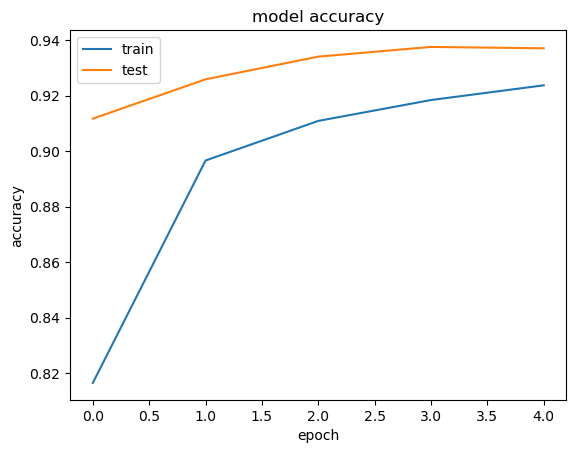

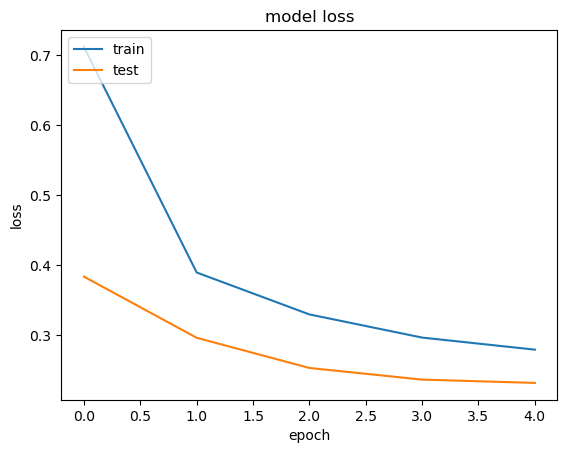

In [388]:
activation_func = "sigmoid"
neurons = 128
model = create_model([neurons],activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

#### 256 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 11s 207us/step - loss: 0.5714 - accuracy: 0.8509 - val_loss: 0.3030 - val_accuracy: 0.9262
Epoch 2/5
54000/54000 [==============================] - 10s 184us/step - loss: 0.3207 - accuracy: 0.9134 - val_loss: 0.2545 - val_accuracy: 0.9335
Epoch 3/5
54000/54000 [==============================] - 10s 177us/step - loss: 0.2710 - accuracy: 0.9254 - val_loss: 0.2107 - val_accuracy: 0.9452
Epoch 4/5
54000/54000 [==============================] - 9s 167us/step - loss: 0.2451 - accuracy: 0.9321 - val_loss: 0.1986 - val_accuracy: 0.9487
Epoch 5/5
54000/54000 [==============================] - 9s 167us/step - loss: 0.2267 - accuracy: 0.9374 - val_loss: 0.1895 - val_accuracy: 0.9490


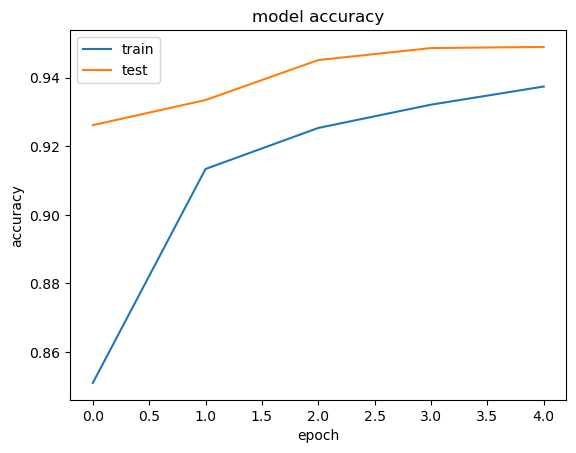

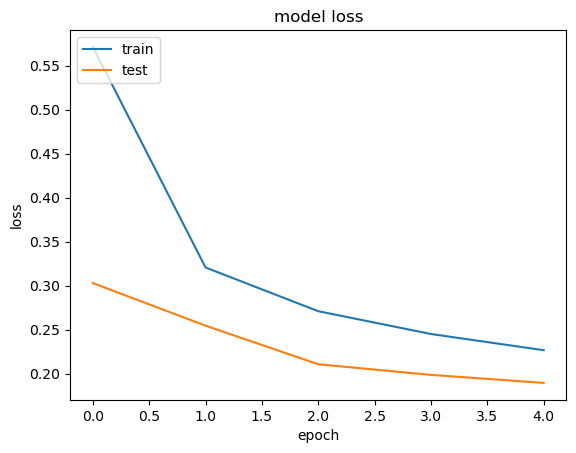

In [389]:
activation_func = "sigmoid"
neurons = 256
model = create_model([neurons],activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

#### 512 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 17s 318us/step - loss: 0.4817 - accuracy: 0.8714 - val_loss: 0.2608 - val_accuracy: 0.9313
Epoch 2/5
54000/54000 [==============================] - 13s 242us/step - loss: 0.2764 - accuracy: 0.9238 - val_loss: 0.2069 - val_accuracy: 0.9487
Epoch 3/5
54000/54000 [==============================] - 13s 238us/step - loss: 0.2326 - accuracy: 0.9346 - val_loss: 0.1847 - val_accuracy: 0.9517
Epoch 4/5
54000/54000 [==============================] - 13s 237us/step - loss: 0.2064 - accuracy: 0.9424 - val_loss: 0.1677 - val_accuracy: 0.9580
Epoch 5/5
54000/54000 [==============================] - 13s 238us/step - loss: 0.1867 - accuracy: 0.9473 - val_loss: 0.1588 - val_accuracy: 0.9600


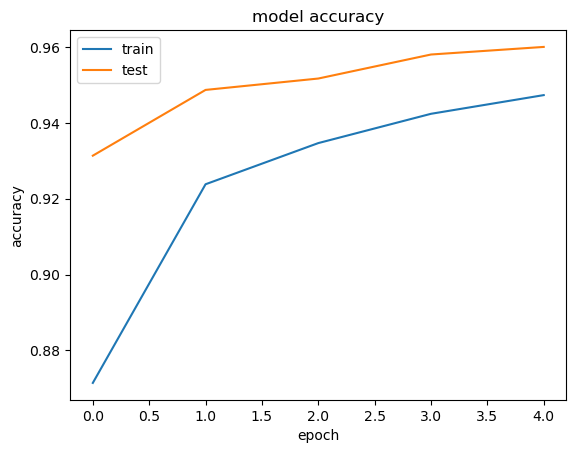

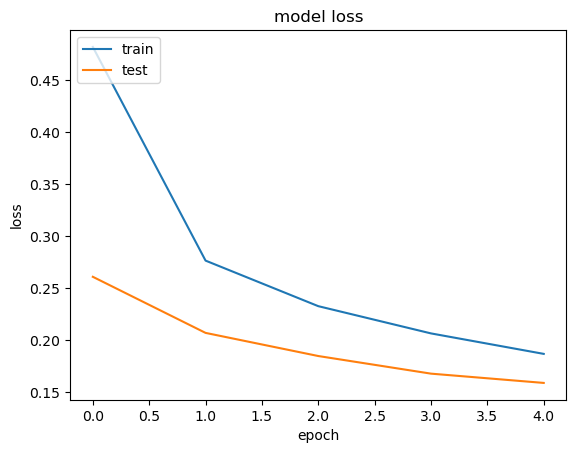

In [390]:
activation_func = "sigmoid"
neurons = 512
model = create_model([neurons],activation_func)
compile_and_plot(model,x_train_nn,y_train_nn)

It is clear that as we increase the number of neurons, the model performs better with the accuracy rate gradually increasing and the loss gradually decreasing in both training and validating datasets. 

### Optimizing Neural Networks Models

From all of the experiments above, the neural networks with "Relu" activation function is more optimal than "Sigmoid" activation function as it could avoid vanishing gradient problem and the base performance of the model with "Relu" function is higher than the model with "Sigmoid" function. Therefore, it should be selected for further optimization.

#### 2 hidden layers with 512 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 18s 340us/step - loss: 0.5994 - accuracy: 0.8479 - val_loss: 0.2724 - val_accuracy: 0.9235
Epoch 2/5
54000/54000 [==============================] - 17s 320us/step - loss: 0.2899 - accuracy: 0.9178 - val_loss: 0.2122 - val_accuracy: 0.9395
Epoch 3/5
54000/54000 [==============================] - 17s 312us/step - loss: 0.2371 - accuracy: 0.9332 - val_loss: 0.1778 - val_accuracy: 0.9532
Epoch 4/5
54000/54000 [==============================] - 17s 313us/step - loss: 0.2020 - accuracy: 0.9425 - val_loss: 0.1564 - val_accuracy: 0.9590
Epoch 5/5
54000/54000 [==============================] - 18s 329us/step - loss: 0.1757 - accuracy: 0.9491 - val_loss: 0.1392 - val_accuracy: 0.9625


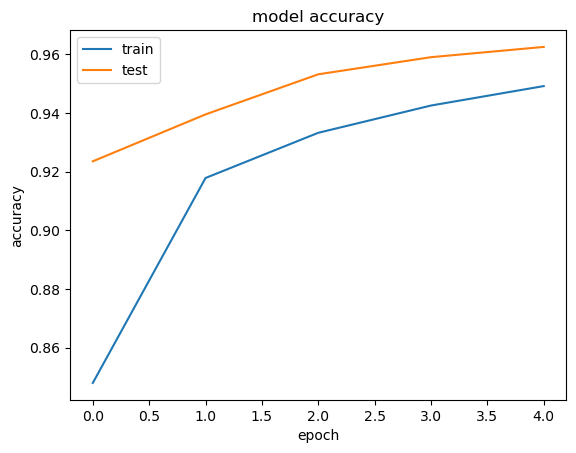

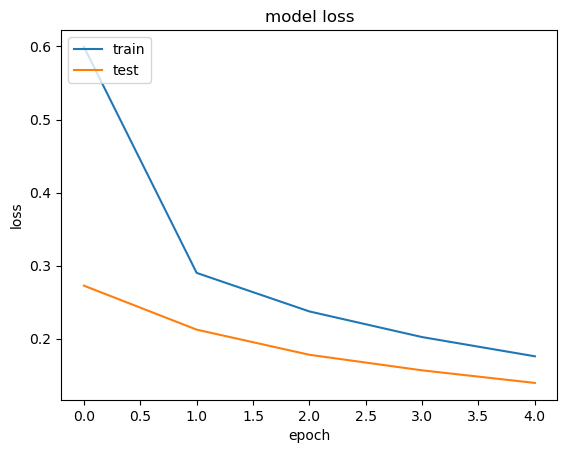

In [405]:
activation_func = "relu"
hidden_layer = 2
model = create_model([512]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn_nl,y_train_nn_nl)

In [406]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn_nl, y_test_nn_nl, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.23%


#### 5 layers with 512 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 34s 622us/step - loss: 0.6546 - accuracy: 0.8288 - val_loss: 0.2228 - val_accuracy: 0.9360
Epoch 2/5
54000/54000 [==============================] - 32s 600us/step - loss: 0.2251 - accuracy: 0.9338 - val_loss: 0.1603 - val_accuracy: 0.9565
Epoch 3/5
54000/54000 [==============================] - 32s 591us/step - loss: 0.1614 - accuracy: 0.9523 - val_loss: 0.1166 - val_accuracy: 0.9673
Epoch 4/5
54000/54000 [==============================] - 32s 586us/step - loss: 0.1246 - accuracy: 0.9629 - val_loss: 0.1016 - val_accuracy: 0.9718
Epoch 5/5
54000/54000 [==============================] - 32s 596us/step - loss: 0.1004 - accuracy: 0.9709 - val_loss: 0.0924 - val_accuracy: 0.9740


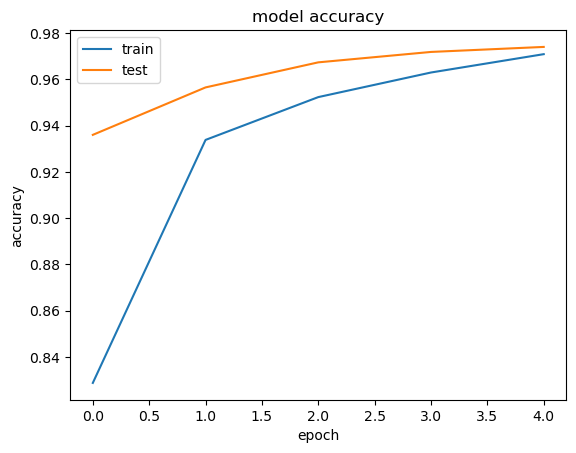

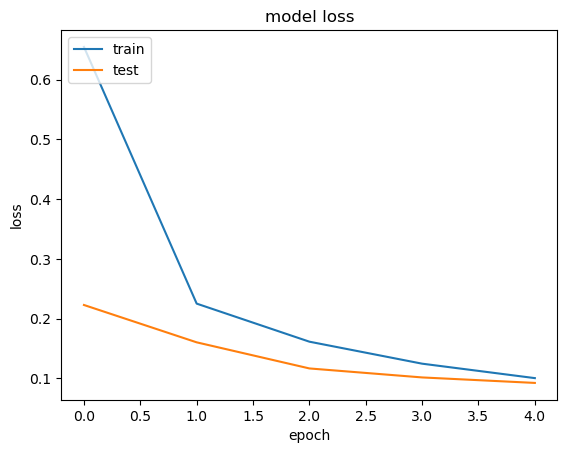

In [409]:
activation_func = "relu"
hidden_layer = 5
model = create_model([512]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn_nl,y_train_nn_nl)

In [411]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn_nl, y_test_nn_nl, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.62%


#### 10 layers with 512 neurons

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 57s 1ms/step - loss: 1.2578 - accuracy: 0.6018 - val_loss: 0.4330 - val_accuracy: 0.8618
Epoch 2/5
54000/54000 [==============================] - 56s 1ms/step - loss: 0.2489 - accuracy: 0.9261 - val_loss: 0.1345 - val_accuracy: 0.9602
Epoch 3/5
54000/54000 [==============================] - 60s 1ms/step - loss: 0.1517 - accuracy: 0.9541 - val_loss: 0.1043 - val_accuracy: 0.9708
Epoch 4/5
54000/54000 [==============================] - 56s 1ms/step - loss: 0.1101 - accuracy: 0.9661 - val_loss: 0.1022 - val_accuracy: 0.9705
Epoch 5/5
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0831 - accuracy: 0.9750 - val_loss: 0.0892 - val_accuracy: 0.9740


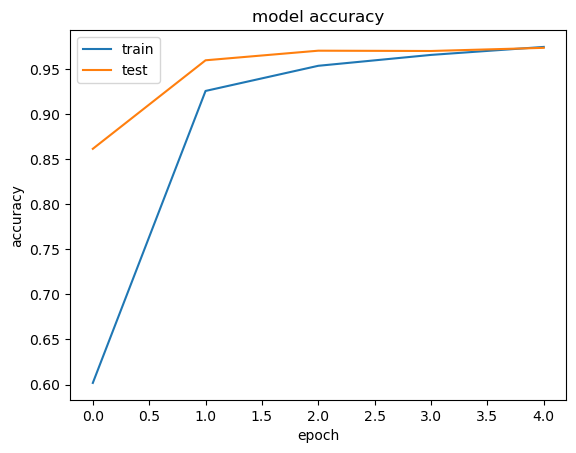

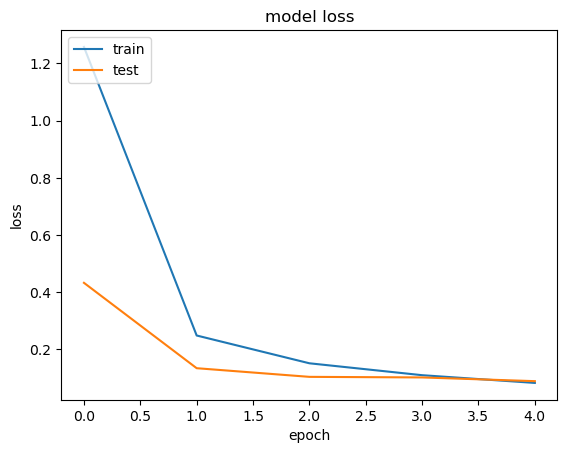

In [412]:
activation_func = "relu"
hidden_layer = 10
model = create_model([512]*hidden_layer,activation_func)
compile_and_plot(model,x_train_nn_nl,y_train_nn_nl)

In [413]:
# Final evaluation of the model
scores = model.evaluate(x_test_nn_nl, y_test_nn_nl, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.64%


From the results above, it can be concluded that while neural networks with 10 layers of 512 neurons shows the highest accuracy score, it also requires longer training time. Therefore, considering cost-effectiveness, neural networks with 5 layers of 512 neurons is more optimal with half of the training time and a slightly lower accuracy score.

## Convolutional Neural Networks

### Preprocess for convolutional neural networks model

In [50]:
# normalize inputs from 0-255 to 0.0-1.0
# Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
x_train_cnn = x_train.reshape(x_train.shape[0],28,28,1)
x_test_cnn = x_test.reshape(x_test.shape[0],28,28,1)
x_train_cnn = x_train_cnn.astype('float32')
x_test_cnn = x_test_cnn.astype('float32')
x_train_cnn = x_train_cnn / 255.0
x_test_cnn = x_test_cnn / 255.0

# Encode the outputs with one hot coding
y_train_cnn = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [51]:
num_classes

10

### Build a convolutional neural networks model

In [52]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

### Compile the model

In [53]:
# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Plot the model

In [54]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               3211776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

### Train the model

In [55]:
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 256s 4ms/step - loss: 0.9848 - accuracy: 0.7439 - val_loss: 0.3098 - val_accuracy: 0.9098
Epoch 2/5
60000/60000 [==============================] - 242s 4ms/step - loss: 0.3040 - accuracy: 0.9098 - val_loss: 0.2231 - val_accuracy: 0.9372
Epoch 3/5
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2351 - accuracy: 0.9293 - val_loss: 0.1826 - val_accuracy: 0.9469
Epoch 4/5
60000/60000 [==============================] - 212s 4ms/step - loss: 0.1986 - accuracy: 0.9416 - val_loss: 0.1577 - val_accuracy: 0.9543
Epoch 5/5
60000/60000 [==============================] - 268s 4ms/step - loss: 0.1748 - accuracy: 0.9477 - val_loss: 0.1391 - val_accuracy: 0.9600


### Evaluate the trained model with testing dataset

In [56]:
# Final evaluation of the model
scores = model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.00%


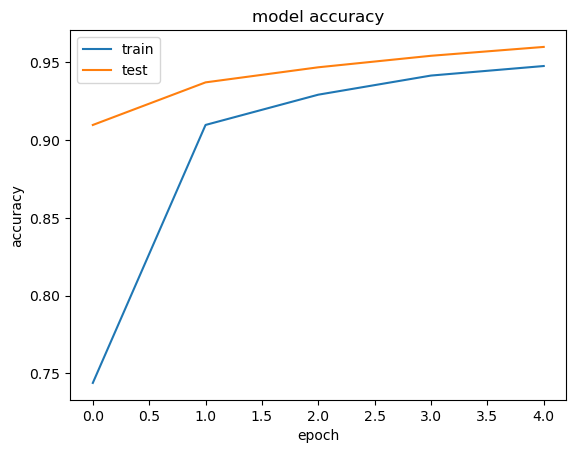

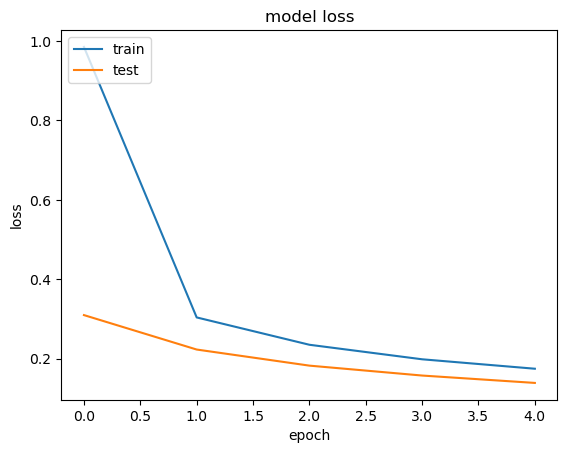

In [57]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Change the model structure

Change the number of convolutional layers and filters

Increase the number of convolutional layers with 32 filters in each layer

In [58]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 391s 7ms/step - loss: 1.0413 - accuracy: 0.7147 - val_loss: 0.2693 - val_accuracy: 0.9205
Epoch 2/5
60000/60000 [==============================] - 358s 6ms/step - loss: 0.2490 - accuracy: 0.9258 - val_loss: 0.1719 - val_accuracy: 0.9487
Epoch 3/5
60000/60000 [==============================] - 308s 5ms/step - loss: 0.1792 - accuracy: 0.9469 - val_loss: 0.1373 - val_accuracy: 0.9572
Epoch 4/5
60000/60000 [==============================] - 317s 5ms/step - loss: 0.1483 - accuracy: 0.9557 - val_loss: 0.1116 - val_accuracy: 0.9666
Epoch 5/5
60000/60000 [==============================] - 314s 5ms/step - loss: 0.1309 - accuracy: 0.9599 - val_loss: 0.0996 - val_accuracy: 0.9694


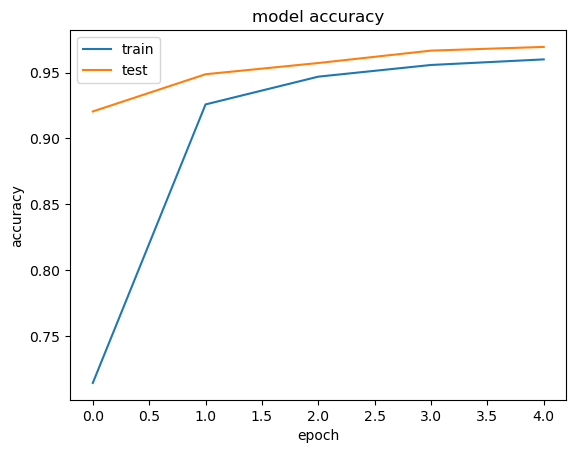

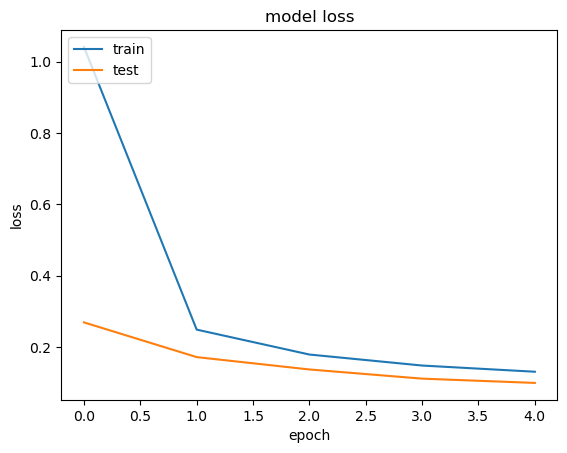

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Increase the number of convolutional layers with increasing number of filters through each layer

In [62]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 897s 15ms/step - loss: 0.8528 - accuracy: 0.7857 - val_loss: 0.2572 - val_accuracy: 0.9231
Epoch 2/5
60000/60000 [==============================] - 1887s 31ms/step - loss: 0.2335 - accuracy: 0.9299 - val_loss: 0.1677 - val_accuracy: 0.9500
Epoch 3/5
60000/60000 [==============================] - 4868s 81ms/step - loss: 0.1724 - accuracy: 0.9485 - val_loss: 0.1338 - val_accuracy: 0.9578
Epoch 4/5
60000/60000 [==============================] - 897s 15ms/step - loss: 0.1436 - accuracy: 0.9565 - val_loss: 0.1112 - val_accuracy: 0.9662
Epoch 5/5
60000/60000 [==============================] - 896s 15ms/step - loss: 0.1256 - accuracy: 0.9622 - val_loss: 0.0953 - val_accuracy: 0.9704


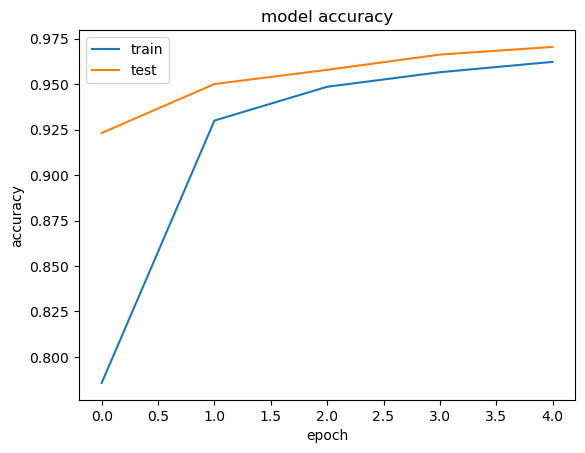

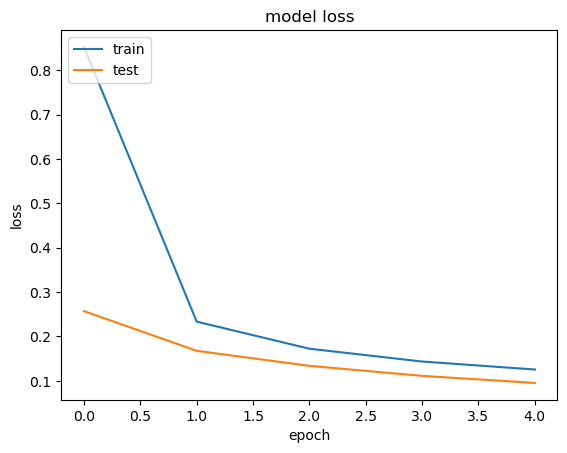

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Overall, the results above show that while both models indicate similar performance, the model with increasing number of filters in each layer takes longer time to train. There are several factors that could affect the training time such as Network Architecture, Batch Size, Learning Rate, Data Size and Complexity, therefore, further adjustments of these factors could be taken in order to examine the training process and the model's performance.

Change the activation function

In [64]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='sigmoid', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 229s 4ms/step - loss: 2.3496 - accuracy: 0.1033 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/5
60000/60000 [==============================] - 226s 4ms/step - loss: 2.3296 - accuracy: 0.1017 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 3/5
60000/60000 [==============================] - 226s 4ms/step - loss: 2.3214 - accuracy: 0.0997 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 4/5
60000/60000 [==============================] - 227s 4ms/step - loss: 2.3146 - accuracy: 0.1030 - val_loss: 2.3004 - val_accuracy: 0.1135
Epoch 5/5
60000/60000 [==============================] - 227s 4ms/step - loss: 2.3103 - accuracy: 0.1046 - val_loss: 2.3003 - val_accuracy: 0.1135


Increase the number of blocks

In [65]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 217s 4ms/step - loss: 2.0066 - accuracy: 0.4618 - val_loss: 1.0175 - val_accuracy: 0.7927
Epoch 2/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.5720 - accuracy: 0.8314 - val_loss: 0.3088 - val_accuracy: 0.9185
Epoch 3/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.3075 - accuracy: 0.9077 - val_loss: 0.2234 - val_accuracy: 0.9330
Epoch 4/5
60000/60000 [==============================] - 219s 4ms/step - loss: 0.2408 - accuracy: 0.9258 - val_loss: 0.1802 - val_accuracy: 0.9476
Epoch 5/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.2027 - accuracy: 0.9382 - val_loss: 0.1568 - val_accuracy: 0.9534


Change the optimizer settings

In [67]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.01
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 209s 3ms/step - loss: 0.2710 - accuracy: 0.9179 - val_loss: 0.1038 - val_accuracy: 0.9673
Epoch 2/5
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1054 - accuracy: 0.9685 - val_loss: 0.0749 - val_accuracy: 0.9759
Epoch 3/5
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0769 - accuracy: 0.9764 - val_loss: 0.0645 - val_accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0583 - val_accuracy: 0.9807
Epoch 5/5
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0539 - val_accuracy: 0.9826


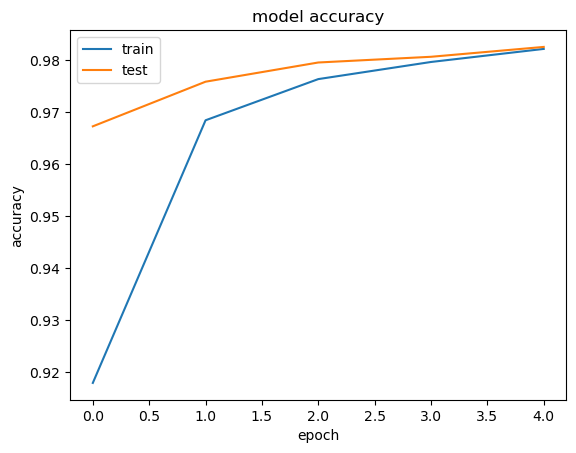

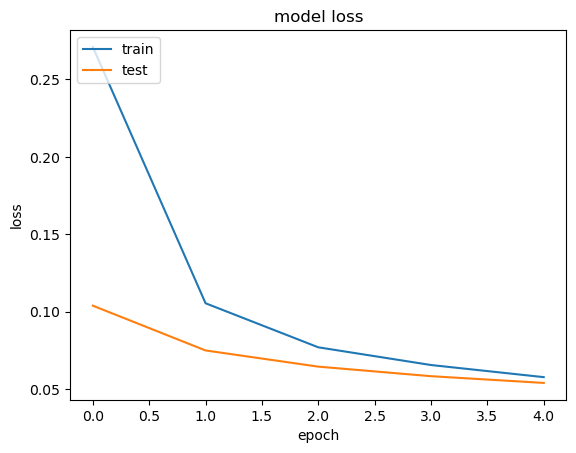

In [68]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# Final evaluation of the model
scores = model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.26%


Change the optimizer

In [66]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 222s 4ms/step - loss: 0.1238 - accuracy: 0.9626 - val_loss: 0.0391 - val_accuracy: 0.9867
Epoch 2/5
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0359 - val_accuracy: 0.9882
Epoch 3/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0316 - val_accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 5/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0163 - accuracy: 0.9943 - val_loss: 0.0389 - val_accuracy: 0.9883


Combinations of adding blocks and changing the optimizer

In [70]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn, y_test_cnn), epochs=epochs, batch_size=60, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 509s 8ms/step - loss: 0.1431 - accuracy: 0.9541 - val_loss: 0.0274 - val_accuracy: 0.9916
Epoch 2/5
60000/60000 [==============================] - 501s 8ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0267 - val_accuracy: 0.9917
Epoch 3/5
60000/60000 [==============================] - 504s 8ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0237 - val_accuracy: 0.9923
Epoch 4/5
60000/60000 [==============================] - 503s 8ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0212 - val_accuracy: 0.9938
Epoch 5/5
60000/60000 [==============================] - 494s 8ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0229 - val_accuracy: 0.9937


In [71]:
# Final evaluation of the model
scores = model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.37%
